### <center>Ângelo Pascoal Figueiral, 44645</center>

## Assignment 2 Machine Learning

This assignment will contain 3 questions with details as below. The due date is March 24th (Wednesday), 2021 23:59PM. Each late day will result in 20% loss of total points.

### Question 1  (40 points) You jump, I jump?

![](https://camo.githubusercontent.com/78ca11f9a2e6c36bbee928124a7d3f9abc3abb2b/68747470733a2f2f696d672d73332e6f6e6564696f2e636f6d2f69642d3537616336353563393365613835613733323935343639652f7265762d302f7261772f732d613730613530323939633033303464336535383266356230373338613366653730396533613564662e6a7067)

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

**Titanic dataset**
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

Data Dictionary 

| Variable        | Definition           | Key  |
| ------------- |:-------------:| -----:|
| survival      | Survival | 0 = No, 1 = Yes |
| pclass      | Ticket class      |   1 = 1st, 2 = 2nd, 3 = 3rd |
| sex         | Gender   |      |
| age | Age in years      |     |
| sibsp | # of siblings / spouses aboard the Titanic      |   Sibling = brother, sister Spouse = husband, wife |
| parch | # of parents / children aboard the Titanic      |     |
| fare | Passenger fare      |     |
| embarked | Port of Embarkation     |   C = Cherbourg, Q = Queenstown, S = Southampton  |
| class | Class of tickets      |  First, Second, Third class   |
| ticket   | Ticket number              |             |
| adult_male |  Is male adult or not | Ture, False              |
| cabin | Cabin number  |  |


Answer the following questions using the provided dataset. You can write down intermediate results towards the final answers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Okay, the Age, Cabin and Embarked attributes are sometimes null (less than 891 non-null), especially the Cabin (77% are null). We will ignore the Cabin for now and focus on the rest. The Age attribute has about 19% null values, so we will need to decide what to do with them. Replacing null values with the median age seems reasonable.

The Name and Ticket attributes may have some value, but they will be a bit tricky to convert into useful numbers that a model can consume. So for now, we will ignore them.

Let's take a look at the numerical attributes:

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Apparently only 38% Survived. :( That's close enough to 40%, so accuracy will be a reasonable metric to evaluate our model.

The mean Fare was 32.20 GBP, which does not seem so expensive (but it was probably a lot of money back then).

The mean Age was less than 30 years old.

Let's check that the target is indeed 0 or 1:

In [6]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Now let's take a quick look at all the categorical attributes:

In [7]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
y_train = train_data[~train_data['Embarked'].isna()]['Survived']

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

In [11]:
train_data.dropna(subset=['Sex', 'Pclass', 'Embarked'], inplace=True)

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [13]:
numerical_features = imputer.fit_transform(train_data[['Age', 'SibSp', 'Parch', 'Fare']])
numerical_features

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [15]:
categorical_features = encoder.fit_transform(train_data[['Sex', 'Pclass', 
                                                         'Embarked']] )
categorical_features

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [16]:
X_train = np.hstack((numerical_features, categorical_features))
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [17]:
y_test = test_data[~test_data['Embarked'].isna()]['Survived']

In [18]:
numerical_features_test = imputer.fit_transform(test_data[['Age', 'SibSp', 'Parch', 'Fare']])
categorical_features_test = encoder.fit_transform(test_data[['Sex', 'Pclass', 'Embarked']] )
X_test = np.hstack((numerical_features_test, categorical_features_test))
X_test

array([[34.5,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [34.5,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [47. ,  1. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [38.5,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [28. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [28. ,  1. ,  1. , ...,  1. ,  0. ,  0. ]])

**Question 1.1 (10 points)** Use logistic regression from scikit-learn library to train on the training set and predict the survival of passengers in the test set. Report the accuracy, confusion matrix, precision, recall and F1 score on both training set and test set and explain whether you have fit the data well.

Accuracy Scores - fraction of predictions the model got right:
    Training set: 0.805
    Test set: 0.766

Precision Scores - ability of not to label as positive a sample that is negative:
    Training set: 0.772
    Test set: 0.69

Recall Scores - ability to find all the positive samples:
    Training set: 0.697
    Test set: 0.667

F1 Scores - weighted average of the precision and recall:
    Training set: 0.733
    Test set: 0.678



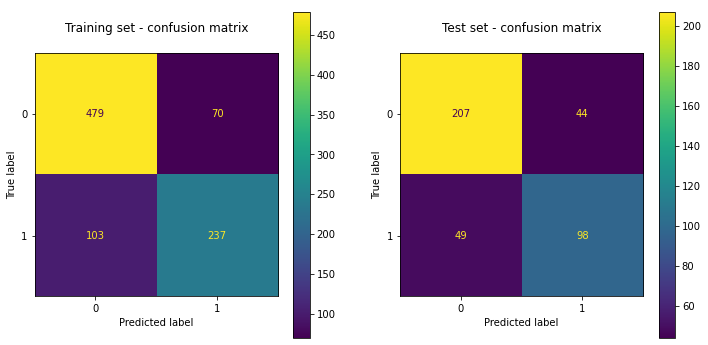

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score

# initializing the Logistic Regression model
log_reg = LogisticRegression(solver="liblinear", random_state=0)
log_reg.fit(X_train, y_train)

# estimating with the model
y_hat_train = log_reg.predict(X_train)
y_hat_test = log_reg.predict(X_test)

# accuracy
print(f"""Accuracy Scores - fraction of predictions the model got right:
    Training set: {round(accuracy_score(y_train, y_hat_train),3)}
    Test set: {round(accuracy_score(y_test, y_hat_test),3)}\n""")

# precision
print(f"""Precision Scores - ability of not to label as positive a sample that is negative:
    Training set: {round(precision_score(y_train, y_hat_train),3)}
    Test set: {round(precision_score(y_test, y_hat_test),3)}\n""")

# recall
print(f"""Recall Scores - ability to find all the positive samples:
    Training set: {round(recall_score(y_train, y_hat_train),3)}
    Test set: {round(recall_score(y_test, y_hat_test),3)}\n""")

# F1
print(f"""F1 Scores - weighted average of the precision and recall:
    Training set: {round(f1_score(y_train, y_hat_train),3)}
    Test set: {round(f1_score(y_test, y_hat_test),3)}\n""")

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_hat_train, labels=[0, 1])
confusion_matrix_test = confusion_matrix(y_test, y_hat_test, labels=[0, 1])

disp1 = ConfusionMatrixDisplay(confusion_matrix_train)
disp2 = ConfusionMatrixDisplay(confusion_matrix_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

disp1.plot(ax=ax1)
disp2.plot(ax=ax2)

ax1.set_title('\nTraining set - confusion matrix\n')
ax2.set_title('\nTest set - confusion matrix\n')

plt.show()

# Q1.1 Findings:

While at first sight the not-so-bad accuracy score might induce us into thinking the model performs ok-ish, the other metrics prove otherwise. This is observable in the very high values of both false positives and false negatives displayed in the confusion matrix and reflected, crucially, on the F1 score, which is particularly important here since there is no clear different in the importance of getting a false positive or a false negative (unlike in other cases, such as cancer prediction models). 

In this case, the inbalance of the dataset (about 70/30 in favor of survivals) is clearly biasing the model towards predicting people would survive, which causes a lot of mispredictions.

The 0.733 and 0.678 F1-score on the training and test sets, respectively, clearly show the model is not fitting the dataset well enough.

---

**Question 1.2 (10 points)** Perform 10-fold cross-validation Logistic regression on training set, and predict the survival of passgners in the test set. Report the accuracy, confusion matrix, precision, recall and F1 score on both training set and test set and explain whether you have fit the data well.

Fold 1: Survivors: 257. Deaths: 141
Fold 2: Survivors: 249. Deaths: 149
Fold 3: Survivors: 258. Deaths: 140
Fold 4: Survivors: 259. Deaths: 139
Fold 5: Survivors: 251. Deaths: 147
Fold 6: Survivors: 258. Deaths: 140
Fold 7: Survivors: 255. Deaths: 143
Fold 8: Survivors: 256. Deaths: 142
Fold 9: Survivors: 257. Deaths: 141
Fold 10: Survivors: 254. Deaths: 144


Accuracy Scores - fraction of predictions the model got right:
    Training set: 0.806
    Test set: 0.791

Precision Scores - ability of not to label as positive a sample that is negative:
    Training set: 0.773
    Test set: 0.741

Recall Scores - ability to find all the positive samples:
    Training set: 0.7
    Test set: 0.694

F1 Scores - weighted average of the precision and recall:
    Training set: 0.735
    Test set: 0.715



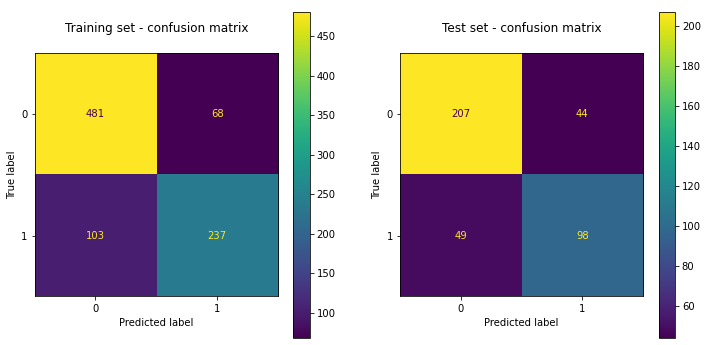

In [20]:
from sklearn.model_selection import cross_validate, ShuffleSplit, cross_val_predict
from scipy import stats

# initializing the Logistic Regression model
log_reg = LogisticRegression(solver="liblinear", random_state=0)
log_reg.fit(X_train, y_train)

# making sure each fold is 20% test set and 80% training set (from the documentation)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# performing cross-validation on the training set
scores = cross_validate(log_reg, X_train, y_train, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=cv, return_train_score=True, return_estimator=True)

y_pred_test_list = []
y_pred_train_list = []

for i, model in zip(range(0, len(scores['estimator'])), scores['estimator']):
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    y_pred_test_list.append(y_pred_test)
    y_pred_train_list.append(y_pred_train)
    
    print(f"Fold {i+1}: Survivors: {len(y_pred_test) - sum(y_pred_test)}. Deaths: {sum(y_pred_test)}") # predicting on the test set


# accuracy
print(f"""\n\nAccuracy Scores - fraction of predictions the model got right:
    Training set: {round(abs(np.mean(scores['train_accuracy'])),3)}
    Test set: {round(abs(np.mean(scores['test_accuracy'])),3)}\n""")

# precision
print(f"""Precision Scores - ability of not to label as positive a sample that is negative:
    Training set: {round(abs(np.mean(scores['train_precision'])),3)}
    Test set: {round(abs(np.mean(scores['test_precision'])),3)}\n""")

# recall
print(f"""Recall Scores - ability to find all the positive samples:
    Training set: {round(abs(np.mean(scores['train_recall'])),2)}
    Test set: {round(abs(np.mean(scores['test_recall'])),3)}\n""")

# F1
print(f"""F1 Scores - weighted average of the precision and recall:
    Training set: {round(abs(np.mean(scores['train_f1'])),3)}
    Test set: {round(abs(np.mean(scores['test_f1'])),3)}\n""")


# confusion matrix with majority vote
y_pred_test_mode = stats.mode(y_pred_test_list)[0][0]
y_pred_train_mode = stats.mode(y_pred_train_list)[0][0]

confusion_matrix_test = confusion_matrix(y_test, y_pred_test_mode, labels=[0, 1])
confusion_matrix_train = confusion_matrix(y_train, y_pred_train_mode, labels=[0, 1])

disp2 = ConfusionMatrixDisplay(confusion_matrix_test)
disp1 = ConfusionMatrixDisplay(confusion_matrix_train)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

disp1.plot(ax=ax1)
disp2.plot(ax=ax2)

ax2.set_title('\nTest set - confusion matrix\n')
ax1.set_title('\nTraining set - confusion matrix\n')

plt.show()

# Q1.2 Findings:

With cross-validation, the model becomes way less depedent on the random (or not so random, which is even worst) allocation of points to the training and test sets. Overall, this improved the model's perfomance quite substancially. Precision, the model's ability of not to classify as a survivor a passenger that died, increased consideraly, which is great. On the other hand, the recall did not increase that much.

In general, the model now fits the data much better, but it's still not an optimal model.

---

**Question 1.3 (10 points)** Plot the ROC curve for the model learned in Question 1.2. What is the TPR and FPR when the probability threshold is 0.5. Adjust the probability threshold to 0.75, and then show TPR and FPR again. What is the AUC score under two different probability thresholds?

In [21]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(log_reg, X_train, y_train, cv=10,
                             method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

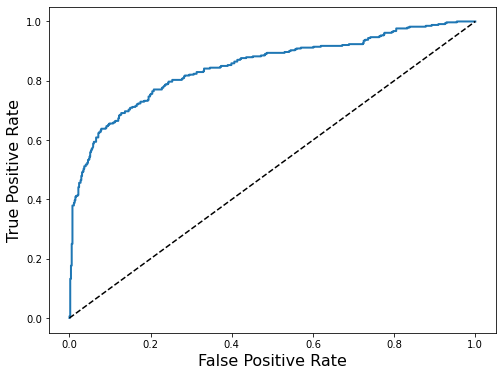

In [22]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.05, 1.05, -0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

plt.show()

In [23]:
roc_dic = { 'FPR': fpr, "TPR": tpr, 'thresholds': thresholds}
roc_df = pd.DataFrame(roc_dic)
roc_df

,FPR,TPR,thresholds
0,0.000000,0.000000,4.938769
1,0.000000,0.002941,3.938769
2,0.000000,0.005882,3.476775
3,0.001821,0.005882,3.332350
4,0.001821,0.132353,2.548362
...,...,...,...
277,0.928962,0.994118,-2.800588
278,0.928962,0.997059,-2.801195
279,0.954463,0.997059,-2.976728
280,0.954463,1.000000,-2.986076


## FPR and TPR for the 0.75 threshold

In [24]:
roc_df_75 = roc_df[(roc_df['thresholds']>0.74) & (roc_df['thresholds']<0.76)]
roc_df_75

,FPR,TPR,thresholds
42,0.045537,0.532353,0.74055


## FPR and TPR for the 0.5 threshold

In [25]:
roc_df_50 = roc_df[(roc_df['thresholds']>0.49) & (roc_df['thresholds']<0.51)]
roc_df_50

,FPR,TPR,thresholds
67,0.07286,0.623529,0.490033


## AUC Scores

In [26]:
from sklearn.metrics import roc_auc_score

print(f'Area Under Curve (AUC) Score: {np.round(roc_auc_score(y_train, y_scores),2)}')

Area Under Curve (AUC) Score: 0.85


Different thresholds mean looking at different points along the ROC curve rather than changes in the curve. Therefore, as the curve stays the same, so does the Area Under the Curve (AUC) - at 0.85. The only changes occur in the values of the FPR and TPR.

**Question 1.4 (10 points)** Show the learning curve (the accuracy with respect to training set size) when you are training using [10, 100, 10]% of samples using cross-validation (10%, 20%..., 90%, 100%). Explain whether your model would benefit from additional data.

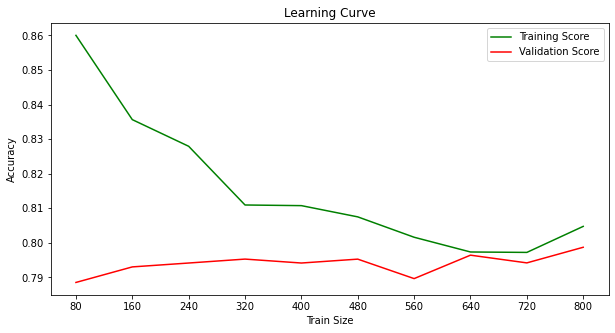

In [27]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(LogisticRegression
                (solver= 'liblinear', random_state = 0), 
                X_train, y_train,  train_sizes = np.arange(0.1,1.1,0.1), cv = 10, scoring = 'accuracy')

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_scores.mean(axis=1), 'g')
plt.plot(train_sizes, validation_scores.mean(axis=1), 'r')
plt.xticks(train_sizes)
plt.xlabel('Train Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(['Training Score', 'Validation Score'])
plt.show()

# Q1.4 Findings:

- The distance between the curves (a red flag in what concerns overfitting) initially decreases heavily, meaning the model improves, providing first indications that as datapoints increase the model gets better;

- While the training score drops quite consistently up until the 640 figure, which is normal because the model is converging to its true accuracy, it seems to start going up after that right at the end. The validation score also seems to start increasing as we increase the number of datapoints further, which are two strong indicators of betterment with the increase datapoints;

- While it very hard to say with confidence and further tests should be conducted, it seems that the model would benefit from additional data.

---

## Question 2 (30 points) How many neighbors do you need?

Let's try to train and fine-tune a K Nearest Neighbor model for the cancer dataset:

In [28]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

We split it into a training set and a test set using train_test_split():

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Question 2.1 (10 points)** Use grid search with cross-validation (with the help of the GridSearchCV from scikit-learn) to search hyperparameter values for a KNeighborsClassifier (e.g. number of neighbors from 2 to 50 neighbors). Plot the cross validation score with each number of neighbors. Expalin your findings.

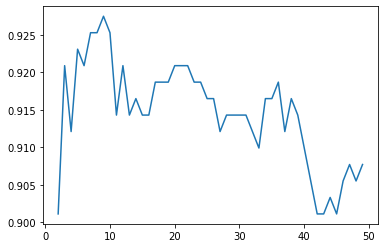

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = {'n_neighbors': [i for i in range(2,50)]}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, n_jobs=-1)

gs_results = gs.fit(X_train, y_train)

scores = gs_results.cv_results_['mean_test_score']

# plotting the scores as a function of the number of neighbors
plt.plot(range(2, 50), scores)
plt.show()

# Q2.1 Findings:

- The KNN algorithm operates on a majority vote of the nearest neighbors of each point.

- From 2 until 9 neighbors, the cross validation score increases, meaning the model improves. This is because the increase in the number of neighbors is reducing the effect of noise in the data, reducing overffiting.

- In the remaining part the cross-validation score decreases, meaning the model is generalizing worse, as the boundaries between classes become blurry. When the number of neighbors is too high, the boundaries between groups become so nuanced that significant groups of a certain class are considered noise. This happens because the neighborhood of each point starts containing more and more points of the opposite class.

- Looking at the graph it becomes quite clear that the number of neighbors that returns the highest accuracy is 9.

---

**Question 2.2 (10 points)** Train it on the full training set using the best hyperparameters, and measure your model’s performance in tersm of accuracy, precision, recall and F1 score on the test set. You should get roughly 94% to 97% accuracy. How many number of neighbors do you have?

In [31]:
# getting the number of neighbors

print(gs_results.best_params_)
print(gs_results.best_estimator_)

gs_results.best_estimator_.fit(X_train, y_train)
test_model = gs_results.best_estimator_.predict(X_test)

scores1 = cross_validate(gs_results.best_estimator_, X_test, y_test, cv=10, scoring = ["accuracy", "f1", "precision", 'recall'], return_train_score=True, return_estimator=True)

# Number of neighbors: 9

{'n_neighbors': 9}
KNeighborsClassifier(n_neighbors=9)


In [32]:
# evaluating the model

model = gs_results.best_estimator_

y_pred_train= model.predict(X_train)
y_pred_test = model.predict(X_test)

score = model.score(X_test, y_test)

# accuracy
print(f"""Accuracy Score - fraction of predictions the model got right:
    Test set: {round(accuracy_score(y_test, y_pred_test),3)}\n""")

# precision
print(f"""Precision Score - ability of not to label as positive a sample that is negative:
    Test set: {round(precision_score(y_test, y_pred_test),3)}\n""")

# recall
print(f"""Recall Score - ability to find all the positive samples:
    Test set: {round(recall_score(y_test, y_pred_test),3)}\n""")

# F1
print(f"""F1 Score - weighted average of the precision and recall:
    Test set: {round(f1_score(y_test, y_pred_test),3)}\n""")

Accuracy Score - fraction of predictions the model got right:
    Test set: 0.956

Precision Score - ability of not to label as positive a sample that is negative:
    Test set: 0.946

Recall Score - ability to find all the positive samples:
    Test set: 0.986

F1 Score - weighted average of the precision and recall:
    Test set: 0.966



**Question 2.3 (10 points)** Given a random patient (say patient 0, show the average characteristics of her/his nearest neighbors as well as the average distance to the patient 0, explain. 

In [33]:
import random

distances, values_ix = model.kneighbors(X_train)

random_patient = random.randint(0, len(X_train))

print(f'Random patient selected: {random_patient}\n')

print(f'\tAverage neighbor distance:\n{np.mean(distances[random_patient])}\n')
print(f"\tAll 9 neighbors' distances:\n{distances[random_patient]}\n\n")

print(f"\tMean neighbor characteristics:\n\n{np.mean(X_train[values_ix[random_patient]], axis=0)}\n")
print(f"\tAll 9 neighbors' characteristics:\n\n{X_train[values_ix[random_patient]]}")

Random patient selected: 246

	Average neighbor distance:
85.75083397749977

	All 9 neighbors' distances:
[  0.          16.06923809  72.67240338  78.17092324  91.12526431
 116.61757131 130.91317753 131.64960457 134.53932336]


	Mean neighbor characteristics:

[2.02833333e+01 2.24633333e+01 1.33666667e+02 1.28433333e+03
 9.74733333e-02 1.36582222e-01 1.67544444e-01 1.00102222e-01
 1.83200000e-01 5.90555556e-02 6.53044444e-01 1.01804444e+00
 4.46500000e+00 8.31122222e+01 6.01033333e-03 2.70444444e-02
 3.39988889e-02 1.39094444e-02 1.59355556e-02 3.56977778e-03
 2.51333333e+01 3.08388889e+01 1.66511111e+02 1.93844444e+03
 1.42766667e-01 3.63766667e-01 4.51211111e-01 2.05166667e-01
 3.05444444e-01 9.02488889e-02]

	All 9 neighbors' characteristics:

[[2.064e+01 1.735e+01 1.348e+02 1.335e+03 9.446e-02 1.076e-01 1.527e-01
  8.941e-02 1.571e-01 5.478e-02 6.137e-01 6.575e-01 4.119e+00 7.702e+01
  6.211e-03 1.895e-02 2.681e-02 1.232e-02 1.276e-02 1.711e-03 2.537e+01
  2.317e+01 1.668e+02 1.946

# Q2.3 Explanation:

- Since this is a KNN  model, the diagnosis of the random patient will be equal to the majority vote of the diagnosis of its 9 nearest neighbors.

- This method assumes, of course, that datapoints that are close share the same characteristics when it comes to the outcome.

- Above are represented the distances between a random patient and its 9 neighbors (best number of neighbors) as well as the values of the features of those neighbors.

---

## Question 3 (30 points) Trees and Forest?

Let's try to try to manually create with random forest models for the moon dataset:

In [34]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=0)

The generated random moons dataset looks like two interleaving half circles:

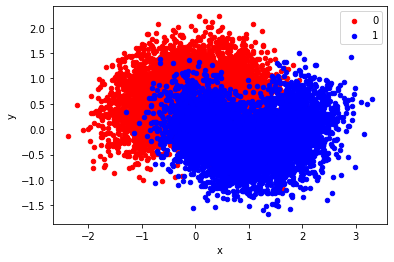

In [35]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

**Question 3.1 (15 points)** generate 1,000 subsets of the training set, each containing 100 instances selected randomly (Hint: you can use Scikit-Learn’s ShuffleSplit class for this.)  Train one Decision Tree on each subset, using the best hyperparameter values (max_leaf_nodes=17 and min_samples_split=2). Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree.

In [36]:
import numpy as np
import sklearn
from sklearn.model_selection import ShuffleSplit, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [40]:
# Training on the whole training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

params = {'max_leaf_nodes': list(range(2, 18)), 'min_samples_split': (list(range(2, 10)))}

grid = GridSearchCV(estimator = DecisionTreeClassifier(), 
                    param_grid = params)

model = grid.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

print(round(accuracy_score(y_test, y_pred_test), 3))

0.848


In [41]:
# Training the 1000 trees with each 100-points subset with a majority-vote at the end

rs = ShuffleSplit(n_splits=1000, train_size=100, test_size=20, random_state=0)

train_subsets = []
for train_index, test_index in rs.split(X_train,y_train):
    train_subsets.append((X_train[train_index], y_train[train_index]))

forest = []
for i in range(1000):
    forest.append(sklearn.base.clone(grid.best_estimator_))
    
scores = []
for tree, (X_subset, y_subset) in zip(forest, subsets):
    tree.fit(X_subset,y_subset)
    y_pred = tree.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

print(round(np.mean(scores), 3))

0.799


**Question 3.2 (15 points)** For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This gives you majority-vote predictions over the test set. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1% higher).

In [42]:
from scipy import stats

pred_list = []
for tree, (X_subset, y_subset) in zip(forest, subsets):
    tree.fit(X_subset,y_subset)
    pred_list.append(tree.predict(X_test))
    mode_pred = stats.mode(pred_list)[0][0]

accuracy_score(y_test, mode_pred)

0.859